## AIDI ASSIGNMENT 2
## AUTHOR: AHMAD SAYEB-200534271

In [6]:
# Packages
#-----------Generic-------------#
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
#----------Clustering-----------#
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder
#---------Algorithms-------------------#
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#--------Dimensionality Reduction------#
from sklearn import decomposition
from sklearn import discriminant_analysis
#--------For Warnings-----------------#
import warnings
warnings.filterwarnings('ignore')
#---------Metrics----------------------#
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report
#-----------Data----------------------#
from sklearn.datasets import load_breast_cancer

### Question 1

In [7]:
def read_csv(path: str) -> 'dataframe':
    '''read the excel file and return a df'''
    
    return pd.read_csv(path)


def drop_cols(df: 'dataframe', cols: list):
    '''drop columns that are specified'''
    df.drop(columns=cols, inplace=True)

    
def label_encoder(df: 'dataframe', col: 'str'):
    '''label encodes the column of the df
    it uses sklearn label encoder'''
    le = preprocessing.LabelEncoder()
    vals = df[col].values
    le.fit(vals)
    encoded_vals = le.transform(vals)
    df[col] = encoded_vals


#This function is not used (Normalization is not necessary for K-means
#Performing k-means on normalized data gave the same result
# However this is used for predictive algorithms
def normalize(df: 'dataframe', cols: list):
    '''normalizes columns of dataframe'''
    transformer = preprocessing.Normalizer()
    for col in cols:
        vals = df[col].values.reshape(1, -1)
        transformer.fit(vals)
        norm_vals = transformer.transform(vals)
        df[col] = norm_vals[0]


def k_means_manhattan(df: 'dataframe'):
    '''
    This function labels the data using k-means cluster
    have used pyClustering library since you can define type of distance measuring
    distance_metric(2) refers to manhattan in this library
    '''
    initial_centers = random_center_initializer(df.values, 4, random_state=5).initialize()
    #distance metric 2 for manhattan
    Kmeans_manhattan = kmeans(df, initial_centers=initial_centers, metric=distance_metric(2))
    Kmeans_manhattan.process()
    pyClusters = Kmeans_manhattan.get_clusters()
    pyCenters = Kmeans_manhattan.get_centers()
    pyEncoding = Kmeans_manhattan.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, df)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    df['Labels'] = pyLabels


def train_test_split(df: 'dataframe'):
    '''
    This function normalizes and splits the data into train and test
    '''
    normalize(df, ['Annual_Income_(k$)', 'Spending_Score'])
    X = df[['Annual_Income_(k$)', 'Spending_Score']]
    Y = df[['Labels']]
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state=0, shuffle=True)
    return X_train, X_test, y_train, y_test


def logistic_reg(X_train: 'df', X_test: 'df', y_train: 'df', y_test: 'df'):
    '''
    applying logistic regression
    '''
    print('performing logistic regression...')
    lr = LogisticRegression(random_state=0, multi_class='multinomial')
    lr.fit(X_train.values, y_train.values.ravel())
    y_lr = lr.predict(X_test.values)
    print('metrics for logistic regression...')
    print(f'accuracy: {accuracy_score(y_test.values.ravel(), y_lr)}')
    print('classification report:\n')
    target_names = ["0","1","2","3"]
    print(classification_report(y_test.values.ravel(), y_lr, target_names=target_names))
    print('confusion matrix for Logistic Regression\n')
    cm = confusion_matrix(y_test.values.ravel(), y_lr, labels=lr.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
    disp.plot()
    plt.show()
    
def decesion_tree(X_train: 'df', X_test: 'df', y_train: 'df', y_test: 'df'):
    '''
    applying decesion tree
    '''
    print('performing Decesion Tree...')
    dt = DecisionTreeClassifier(random_state=0, max_depth=5)
    dt.fit(X_train.values, y_train.values.ravel())
    y_dt = dt.predict(X_test.values)
    print('metrics for Decesion Tree...')
    print(f'accuracy: {accuracy_score(y_test.values.ravel(), y_dt)}')
    print('classification report:\n')
    target_names = ["0","1","2","3"]
    print(classification_report(y_test.values.ravel(), y_dt, target_names=target_names))
    print('confusion matrix for Decesion Tree\n')
    cm = confusion_matrix(y_test.values.ravel(), y_dt, labels=dt.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
    disp.plot()
    plt.show()


def random_forest(X_train: 'df', X_test: 'df', y_train: 'df', y_test: 'df'):
    '''
    applying random forest
    '''
    print('performing Random Forest...')
    rf = RandomForestClassifier(random_state=0, max_depth=5)
    rf.fit(X_train.values, y_train.values.ravel())
    y_rf = rf.predict(X_test.values)
    print('metrics for Random Forest...')
    print(f'accuracy: {accuracy_score(y_test.values.ravel(), y_rf)}')
    print('classification report:\n')
    target_names = ["0","1","2","3"]
    print(classification_report(y_test.values.ravel(), y_rf, target_names=target_names))
    print('confusion matrix for Random Forest\n')
    cm = confusion_matrix(y_test.values.ravel(), y_rf, labels=rf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
    disp.plot()
    plt.show()

def naive_bayes(X_train: 'df', X_test: 'df', y_train: 'df', y_test: 'df'):
    '''
    applying naive bayes
    '''
    print('performing Random Forest...')
    nv = GaussianNB()
    nv.fit(X_train.values, y_train.values.ravel())
    y_nv = nv.predict(X_test.values)
    print('metrics for Naive Bayes...')
    print(f'accuracy: {accuracy_score(y_test.values.ravel(), y_nv)}')
    print('classification report:\n')
    target_names = ["0","1","2","3"]
    print(classification_report(y_test.values.ravel(), y_nv, target_names=target_names))
    print('confusion matrix for Naive Bayes\n')
    cm = confusion_matrix(y_test.values.ravel(), y_nv, labels=nv.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nv.classes_)
    disp.plot()
    plt.show()


#### Loading Data

In [8]:
df = read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [9]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [12]:
print('label encoding data...')
label_encoder(df, 'Genre')
print('Removing columns that are not needed...')
drop_cols(df, ['CustomerID', 'Genre', 'Age'])
print('data after pre-processing...')
df.head(10)

label encoding data...
Removing columns that are not needed...
data after pre-processing...


,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


#### Running K-Mean clustering and Labeling Data

In [13]:
print('running k-means clustering with manhattan distance...')
print('applying the labels based on k-means')
k_means_manhattan(df)
print('data after labelling...')
df['Lables'] = df['Labels'].astype(str)

running k-means clustering with manhattan distance...
applying the labels based on k-means
data after labelling...


In [14]:
df.head(10)

,Annual_Income_(k$),Spending_Score,Labels,Lables
0,15,39,3,3
1,15,81,1,1
2,16,6,3,3
3,16,77,1,1
4,17,40,3,3
5,17,76,1,1
6,18,6,3,3
7,18,94,1,1
8,19,3,3,3
9,19,72,1,1


#### Performing Algorithms

In [15]:
# splitting the data and normalizing
X_train, X_test, y_train, y_test = train_test_split(df)

**Logistic Regression**

performing logistic regression...
metrics for logistic regression...
accuracy: 0.48
classification report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        10
           3       0.48      1.00      0.65        24

    accuracy                           0.48        50
   macro avg       0.12      0.25      0.16        50
weighted avg       0.23      0.48      0.31        50

confusion matrix for Logistic Regression



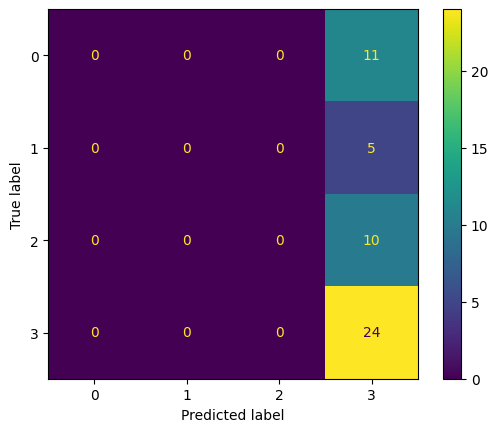

In [16]:
logistic_reg(X_train, X_test, y_train, y_test)

**Decesion Tree**

performing Decesion Tree...
metrics for Decesion Tree...
accuracy: 0.94
classification report:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.80      0.89         5
           2       1.00      0.90      0.95        10
           3       0.92      0.96      0.94        24

    accuracy                           0.94        50
   macro avg       0.96      0.91      0.93        50
weighted avg       0.94      0.94      0.94        50

confusion matrix for Decesion Tree



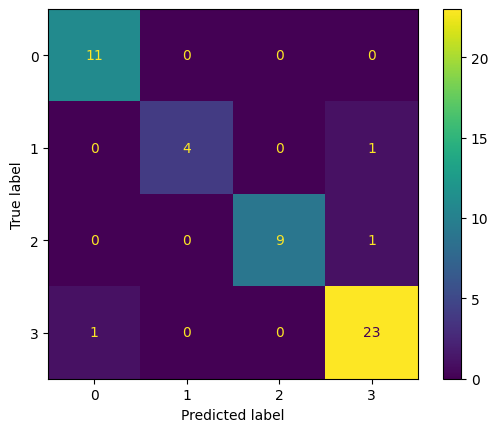

In [17]:
decesion_tree(X_train, X_test, y_train, y_test)

**Random Forest**

performing Random Forest...
metrics for Random Forest...
accuracy: 1.0
classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        24

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

confusion matrix for Random Forest



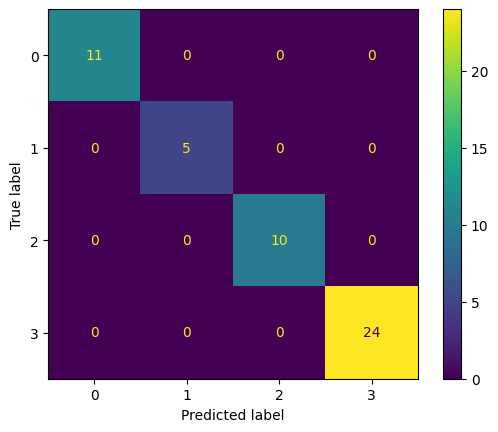

In [18]:
random_forest(X_train, X_test, y_train, y_test)

performing Random Forest...
metrics for Naive Bayes...
accuracy: 0.96
classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.80      0.89         5
           2       1.00      0.90      0.95        10
           3       0.92      1.00      0.96        24

    accuracy                           0.96        50
   macro avg       0.98      0.93      0.95        50
weighted avg       0.96      0.96      0.96        50

confusion matrix for Naive Bayes



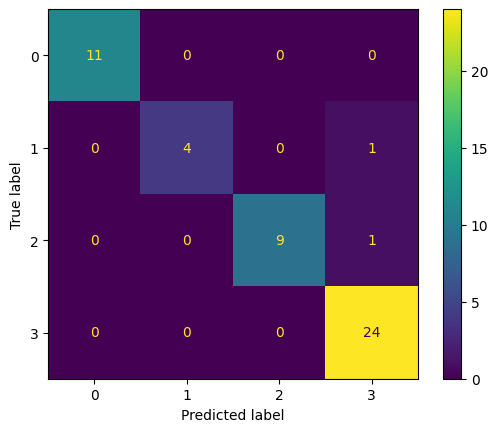

In [19]:
naive_bayes(X_train, X_test, y_train, y_test)

#### Conclusion


Homegenity indicates that the data within one cluster are close and similiar to each other. Given that all the models (Except logistic regression) are performing extremely good and that indicates that homogenity is actually perserved in the clustering of the data by k-means cluster.

## Question 2

In [94]:
def label_target(row):
    '''
    target variables which consist of two unique values
    are changed to labels
    '''
    if row == -1.2965349:
        return "0"
    if row == 0.76993109:
        return "1"

    
def load_data():
    '''
    load breast cancer data and normalize it
    '''
    cancer = load_breast_cancer()
    df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))
    y = df[['target']]
    df = df.loc[:, df.columns != 'target']
    df_normalized=(df - df.mean()) / df.std()
    final_df = pd.concat([df_normalized, y], axis=1)
    final_df['target'] = final_df['target'].astype(str)
    return final_df


def label_target(row):
    '''
    target variables which consist of two unique values
    are changed to labels
    '''
    if row == -1.2965349:
        return "0"
    if row == 0.76993109:
        return "1"
    
def pca_reduction(df: 'dataframe', n: int) -> 'dataframe':
    '''
    peform pca reduction on dataframe 
    '''
    X = df.loc[:, df.columns != 'target']
    pca = decomposition.PCA(n_components=n)
    principal_comp = pca.fit_transform(X)
    principal_df = pd.DataFrame(data=principal_comp, columns=['principal_comp_1', 'principal_comp_2'])
    final_df = pd.concat([principal_df, df[['target']]], axis=1)
    
    #plot the PCA and the old data
    X_new = pca.inverse_transform(principal_comp)
    plt.scatter(X['mean compactness'].values, X['mean concavity'].values, label='original columns', alpha=0.2)
    plt.scatter(X_new[:, 0], X_new[:, 1],label='pca components', alpha=0.8)
    plt.axis('equal')
    plt.legend(loc="upper left")
    plt.xlabel('PCA Component 1 & Mean Compactness')
    plt.ylabel('PCA Component 2 & Mean Concavity')
    plt.title('PCA Components Compare to Columns')
    

    labels = {
        str(i): f"PC {i+1} ({var:.1f}%)"
        for i, var in enumerate(pca.explained_variance_ratio_ * 100)
    }

    fig = px.scatter_matrix(
        principal_comp,
        labels=labels,
        dimensions=[0,1],
        color=final_df["target"]
    )
    fig.update_traces(diagonal_visible=False)
    fig.show()
    return final_df


def lda_reduction(df: 'dataframe',n: int):
    '''
    performs lda reduction on datframe
    '''
    
    X = df.loc[:, df.columns != 'target']
    y = df[['target']]
    lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=n)
    lda_comp = lda.fit_transform(X, y)
    lda_df = pd.DataFrame(data=lda_comp, columns=['lda_comp_1'])
    final_df = pd.concat([lda_df, df[['target']]], axis=1)
    print(f'variance ratio is: {lda.explained_variance_ratio_ *100}')
    return final_df

#### Loading data

In [80]:
df_cancer = load_data()

In [81]:
df_cancer.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,0.0
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,0.0
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,0.0
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,0.0
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,0.0
5,-0.475956,-0.834601,-0.386808,-0.505206,2.235455,1.243242,0.865540,0.823931,1.004518,1.888343,...,-0.313560,-0.114908,-0.244105,2.046712,1.720103,1.262133,0.905091,1.752527,2.239831,0.0
6,1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,0.646366,-0.064268,-0.761662,...,0.322599,1.367122,1.274098,0.518184,0.021196,0.509104,1.195664,0.262245,-0.014718,0.0
7,-0.118413,0.358135,-0.072803,-0.218772,1.602639,1.139100,0.060972,0.281702,1.402121,1.658894,...,0.400695,0.099361,0.028834,1.446688,0.724148,-0.021035,0.623647,0.477221,1.724917,0.0
8,-0.319885,0.588312,-0.183919,-0.383870,2.199903,1.682529,1.218025,1.149680,1.963872,1.571079,...,0.822090,-0.031581,-0.248145,1.661295,1.816711,1.278909,1.390393,2.387756,1.287517,0.0
9,-0.473118,1.104467,-0.329192,-0.508616,1.581308,2.561105,1.737343,0.940932,0.796597,2.780649,...,2.440961,-0.286026,-0.297148,2.318256,5.108382,3.991920,1.618591,2.368360,6.840837,0.0


#### Applying pca reduction 

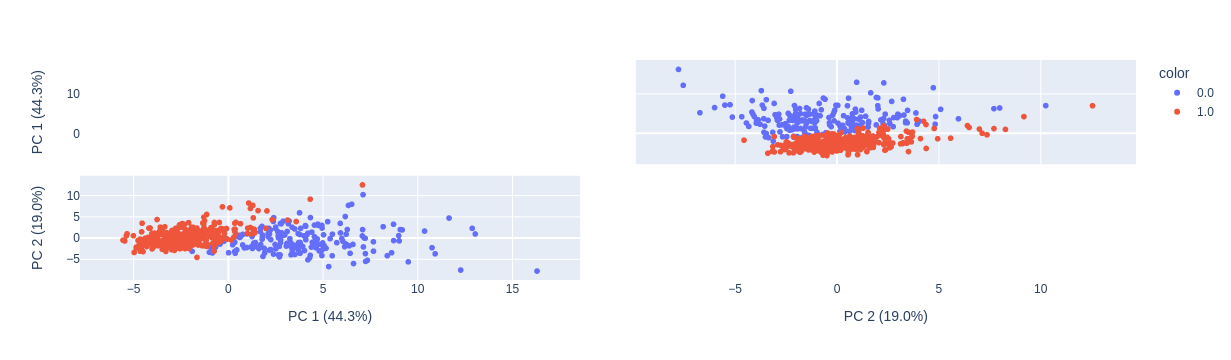

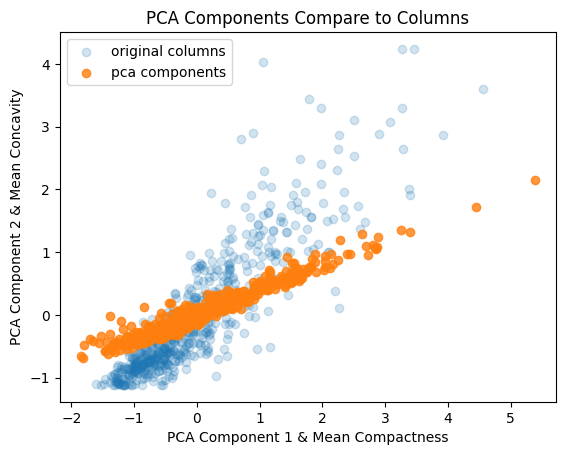

In [82]:
pca_2_df = pca_reduction(df_cancer, 2)

In [83]:
pca_2_df

,principal_comp_1,principal_comp_2,target
0,9.184755,1.946870,0.0
1,2.385703,-3.764859,0.0
2,5.728855,-1.074229,0.0
3,7.116691,10.266556,0.0
4,3.931842,-1.946359,0.0
...,...,...,...
564,6.433655,-3.573673,0.0
565,3.790048,-3.580897,0.0
566,1.255075,-1.900624,0.0
567,10.365673,1.670540,0.0


#### Performing LDA

In [95]:
lda_df = lda_reduction(df_cancer,1)
lda_df.head(10)

variance ratio is: [100.]


,lda_comp_1,target
0,-3.323927,0.0
1,-2.319108,0.0
2,-3.747425,0.0
3,-4.048549,0.0
4,-2.281158,0.0
5,-1.611503,0.0
6,-2.356531,0.0
7,-1.281223,0.0
8,-1.608281,0.0
9,-3.862667,0.0


#### Comments

Maximum Variance individually from pca is 44.3% and combined it is 63.9% while in lda it is 100%.This shows that lda performs better at reducing the dimension of this data. One rease for lda to perform better could be that it takes into account different classes in the data and tries to maximise the variance ratio in that class.